# Minimierung Fehlklassifikationswahrscheinlichkeit – $C_1 < C_2$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sympy import *

In [2]:
mu1 = 4
var1 = 25

mu2 = 8
var2 = 4

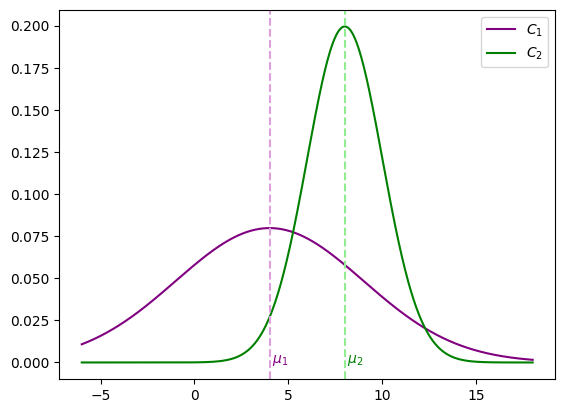

In [3]:
left_border = mu1 - 10
right_border = mu2 + 10

x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label='$C_2$')

plt.axvline(x=mu1, color='plum', linestyle='--')
plt.axvline(x=mu2, color='lightgreen', linestyle='--')

plt.annotate(r'$\mu_1$', xy=(mu1 + 0.1, 0), color='purple')
plt.annotate(r'$\mu_2$', xy=(mu2 + 0.1, 0), color='green')

plt.legend()
plt.show()

In [4]:
x = Symbol('x')

lhs = (x - mu2)**2 / var2 - (x - mu1)**2 / var1
rhs = 2 * ln(sqrt(var1 /var2))
eqn = Eq(lhs, rhs)

x = solveset(eqn)
print(x.n())
x = list(x)

{5.24697996717107, 12.2768295566385}


In [5]:
print(f'R1 = (-inf, {x[0]:.4f}) + ({x[1]:.4f}, +inf)')
print(f'R2 = ({x[0]:.4f}, {x[1]:.4f})')

R1 = (-inf, 5.2470) + (12.2768, +inf)
R2 = (5.2470, 12.2768)


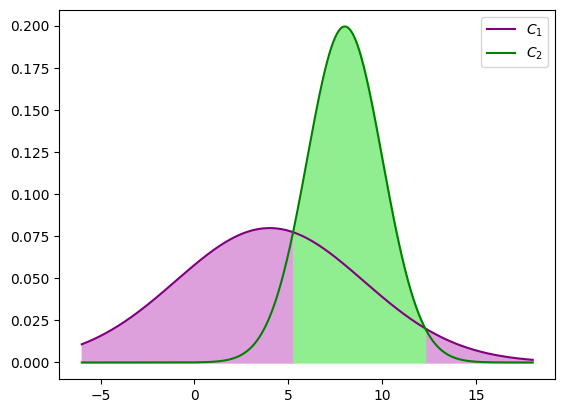

In [6]:
x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label='$C_2$')

R1_1 = np.linspace(left_border, float(x[0]))
plt.fill_between(R1_1, norm.pdf(R1_1, mu1, np.sqrt(var1)), color='plum')

R1_2 = np.linspace(float(x[1]), right_border)
plt.fill_between(R1_2, norm.pdf(R1_2, mu1, np.sqrt(var1)), color='plum')

R2 = np.linspace(float(x[0]), float(x[1]))
plt.fill_between(R2, norm.pdf(R2, mu2, np.sqrt(var2)), color='lightgreen')

plt.legend()
plt.show()

## Verlustmatrix

In [7]:
L = np.array([[0, 3], [7, 0]])

In [8]:
x = Symbol('x')

lhs = (x - mu2)**2 / var2 - (x - mu1)**2 / var1
rhs = 2 * ln(L[1][0] / L[0][1] * sqrt(var1 /var2))
eqn = Eq(lhs, rhs)

x = solveset(eqn)
print(x.n())
x = list(x)

{4.24259068287764, 13.2812188409319}


In [9]:
print(f'R1 = (-inf, {x[0]:.4f}) + ({x[1]:.4f}, +inf)')
print(f'R2 = ({x[0]:.4f}, {x[1]:.4f})')

R1 = (-inf, 4.2426) + (13.2812, +inf)
R2 = (4.2426, 13.2812)


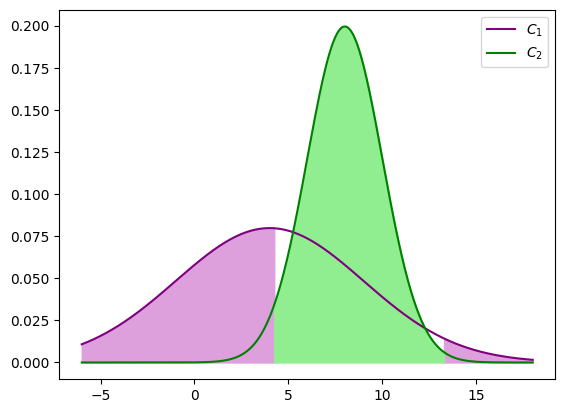

In [10]:
x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label='$C_2$')

R1_1 = np.linspace(left_border, float(x[0]))
plt.fill_between(R1_1, norm.pdf(R1_1, mu1, np.sqrt(var1)), color='plum')

R1_2 = np.linspace(float(x[1]), right_border)
plt.fill_between(R1_2, norm.pdf(R1_2, mu1, np.sqrt(var1)), color='plum')

R2 = np.linspace(float(x[0]), float(x[1]))
plt.fill_between(R2, norm.pdf(R2, mu2, np.sqrt(var2)), color='lightgreen')

plt.legend()
plt.show()

## Unterschiedliche Klassenverteilung

In [11]:
p_C1 = 4/12
p_C2 = 8/12

In [12]:
x = Symbol('x')

lhs = (x - mu2)**2 / var2 - (x - mu1)**2 / var1
rhs = 2 * ln(p_C2 / p_C1 * sqrt(var1 / var2))
eqn = Eq(lhs, rhs)

x = solveset(eqn)
print(x)
x = list(x)

{4.40804463183028, 13.1157648919792}


In [13]:
print(f'R1 = (-inf, {x[0]:.4f}) u ({x[1]:.4f}, +inf)')
print(f'R2 = ({x[0]:.4f}, {x[1]:.4f})')

R1 = (-inf, 4.4080) u (13.1158, +inf)
R2 = (4.4080, 13.1158)


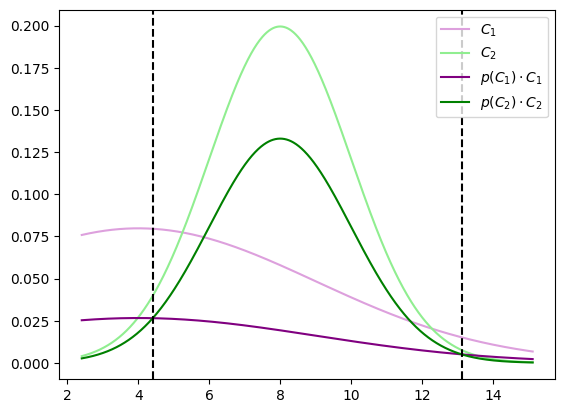

In [14]:
left_border = float(x[0]) - 2
right_border = float(x[1]) + 2

x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='plum', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='lightgreen', label='$C_2$')

plt.plot(x_plot, p_C1 * norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label=r'$p(C_1) \cdot C_1$')
plt.plot(x_plot, p_C2 * norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label=r'$p(C_2) \cdot C_2$')

plt.axvline(x=x[0], color='black', linestyle='--')
plt.axvline(x=x[1], color='black', linestyle='--')

plt.legend()
plt.show()